#  Hypothesis testing, simple case

*Author: Jose A. Hernando*, January 2020

*Instituto Galego de Altas Enerxías. Universidade de Santiago de Compostela, Spain.*

In [1]:
import time
print( ' Last Execution ', time.asctime())

 Last Execution  Mon Feb 27 17:23:40 2023


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2
 
# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

import httoys    as httoys
import htcore    as htcore
import htcatalog as htcata
import htplot    as htplot

plt.style.context('seaborn-colorblind');

## Introduction


The simple hypothesis testing involves a null hypothesis $H_0$ (i.e the SM) and al alternative hypothesis $H_1$ (i.e BSM Physics).

Given data, $x$, which of both hypothesis agree better with data? 

Can we exclude $H_1$? At what level? 

Can claim an *observation* or a *discovery* of New Physics?

We will try to solve these questions in this lecture.

Look at the following simple example, $H_0, H_1$ are both gaussians with sigma one, $H_0$ has mean zero and $H_1$ has mean one. 

Given an observation, $x_0$, data agrees more $H_0$ or with $H_1$?

**Explora** in the next Python cell. Execute few events. See where the data, $x_0$, falls along the axis. Move the gaussians appart, change their widths.

(Forget for the moment the printed values, except for the observed data)

observed data : [0.04775964]
H0 p-value    : 0.48095390
H1 p-value    : 0.00157739
CLs           : 0.00303901 


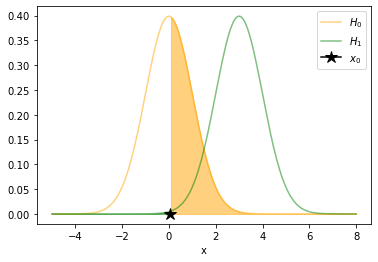

In [3]:
mu0, mu1, mutrue = 0, 3, False
httoys.gaussian(mu0, mu1, mutrue = mutrue);

**questions**:
- That the $x$ axis in the case allow us to quatify the "distance" between hypotheses. To the left is more $H_0$, to the right more $H_1$.
    
- $H_0$ is on the left. There is a colored area behind the curve of $H_0$ and on the right of the data, $x_0$. What corresponds that area to?
    
- $H_1$ is on the right. There is a colored area behind the curve of $H_1$ and on the left of the data, $x_0$. Now, what corresponds that area to?

----

## Test statistic

We need to **order** data, $x$, along the axis from $H_0$ to $H_1$, to the left is more $H_0$, to the right, more $H_1$.

The **test estatistics**, $q(x)$, is a real scalar quantity that quantifies how compatible is our data, $x$, with the null, $H_0$, and the alternative, $H_1$, hypotheses. 

As convention, we consider that as $q(x)$ values increases, they indicate a better agreement with $H_1$ than with $H_0$. 


The *optimal* test-stats is the likelihood ratio.

For convenience we use (-2 log-like-ratio):

$$
q(x) = -2 \log \, \frac{ \mathcal{L}(x \, | \, H_0)}{ \mathcal{L}(x \, | \, H_1)}
$$



optimal: better efficicieny for $H_1$ for the same fraction of $H_0$ contamination (see later).

*Note*: En many cases, we do not know how to compute $q(x)$ and then we use *multivariate methods* as **Neural Networks** (NN) or **Boosted Decision Trees** (BDTs). They provide a test-statistics!

Now, we need to compute the pdf of $q$ for both hypothesis, $g(q| H_0)$ and $g(q | H_1)$.

In some cases we can do it analytically, but in others is almost impossible.

Nevertheless, we can do **simulations** and compute the $q$ values and obtain its distribution for *all possible events* of the $H_0$ type, $\{ x \}_0$, and $H_1$, $\{ x \}_1$. 



### Gaussian as an example

**Example:** Consider as $H_0$ a gaussian distribution with mean $\mu_0$ and $\sigma_0$;
and $H_1$ again a gaussian distribution with $\mu_1$ and $\sigma_1$. Obtain the pdfs,  $g(q |H_0)$ and $g(q|H_1)$ for $\mu_0 = 0, \, \sigma_0 = 1, \, \mu_1 = 4, \, \sigma_1 = 2$. 


In [4]:
def two_gaussian(mu0, sigma0, mu1, sigma1, size = 10000):

    # the test-statistic function
    def q(x, m1=mu1, s1=sigma1, m0=mu0, s0=sigma0):
        return (x-m0)*(x-m0)/(s0*s0) - (x-m1)*(x-m1)/(s1*s1)

    # hipothesis
    h0 = stats.norm(mu0, sigma0)
    h1 = stats.norm(mu1, sigma1)

    # m-experiments for both hypothesis
    x0s = h0.rvs(size = int(size))
    x1s = h1.rvs(size = int(size))

    # the q-values for the m-experiments of both hypothesis
    q0s = q(x0s) 
    q1s = q(x1s)

    return q0s, q1s

In [5]:
def plt_test_stats(q0s, q1s, bins = 100, range = None):
    range = (np.min(q0s), np.max(q1s)) if range is None else range
    plt.hist(q0s, bins, density = True, range = range, color = 'blue', 
             alpha = 0.8, label = '$q(x|H_0)$', histtype = 'step');
    plt.hist(q1s, bins, density = True, range = range, color = 'red' , 
             alpha = 0.8, label = '$q(x|H_1)$', histtype = 'step');
    plt.xlabel('$q(x)$'); plt.ylabel('$g(q|x)$')
    plt.legend(); 

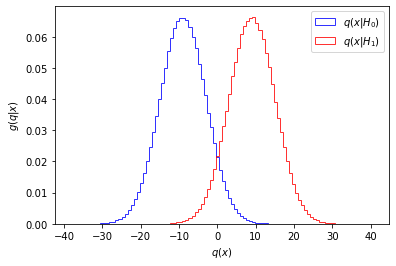

In [6]:
q0s, q1s = two_gaussian(0., 1., 3., 1., size = 1e6)
plt_test_stats(q0s, q1s);

**Question:** Consider that we measure $q(x) = -10$, what can you say about $H_1$? And if we measure $q(x) = 30$?


**Question:** Discuss what happens when the distributions overlap and when they do not.

**Note:** why using $-2 \ln$ is convenient! 

### A counting experiment

Several experiments are called **counting experiments**, they search for a signal, expecting a given number of events $s$, over a background level, $b$. This is a first approximation for a Rare Event Search.

The distribution of the data follows a poisson distribution with mean, $b$, in the case of only background and a poission distribution with mean $b+s$ in the presence of signal.

**Explore** in the following cell how the distributions changes with $b$ and $s$, and how the result of the experiment changes depending on $data$ .

observed data : 1
H0 p-value    : 0.95021293
H1 p-value    : 0.00049940
CLs           : 0.00250768 


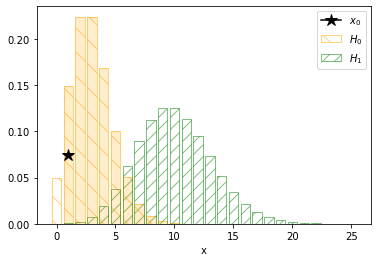

In [7]:
mu0, mu1, mutrue = 3, 10., False
httoys.poisson(mu0, mu1, mutrue = mutrue);

**Exercise**: Consider now a poisson distribution with $\mu_0 = b$ for $H_0$ and $H_1$ another poisson distribution with $\mu_1 = b + s$ for $H_1$, consider $b=3, s=2$. Obtain the pdfs of the test-stadistics, $g(q| H_0), \; g(q | H_1)$.

In [8]:
def two_poisson(b, s, size = 1000000):

    def q(n):
        return 2 *n * ( np.log(b+s) - np.log(b)) 
    
    # hipothesis
    h0 = stats.poisson(b)
    h1 = stats.poisson(b + s) 

    # m-experiments for both hypothesis
    x0s = h0.rvs(size = int(size))
    x1s = h1.rvs(size = int(size))

    # the q-values for the m-experiments of both hypothesis
    q0s = q(x0s) 
    q1s = q(x1s)

    return q0s, q1s

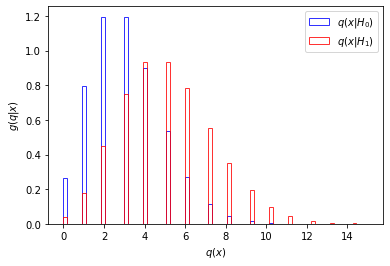

In [9]:
q0s, q1s = two_poisson(3, 2)
plt_test_stats(q0s, q1s, bins = 80, range = (0, 15));

**Exercise** Consider now NEXT experiment as a counting experiment. Compute now the number of possible $\beta\beta0\nu$ events in 100 kg of Xenon if the half-lifetime is $10^{-25}$ y. Compute also the number of expected background events, if the background index is $4 \times 10^{-4}$ counts/(keV kg y) and with 1% energy resolution at $Q_{\beta\beta} = 2.458$ MeV. Obtain the pdfs of the test statistics. Consider that the signal is gaussian distributed and take 3 sigmas as Region of Interest (RoI). 

**Explore**: Modify now the background index, the resolution, the Xe mass and the half-lifetime.

### N-poisson case

Another case very common is a n-bin counting experiments. For example the first $B_s \to \mu^+ \mu^-$ very rare [decay search](https://arxiv.org/pdf/1110.2411) at LHCb. In every bin there is an expectation for the background and for the signal. If the bins are independent, each one is like a single-counting experiment.

**Explore**: In the following cell we are simulating one event for a n-bin counting experiment. Play with the background and the signal, and the number of bins.


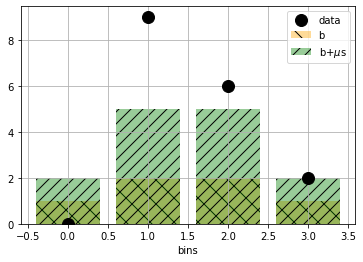

In [10]:
b, s = [1., 2., 2., 1.], [1, 3, 3, 1]
httoys.npoisson_rvs(b, s)

**Exercise**: Consider a counting experiment with four independent bins. The background for $H_0$ is poisson distributed in each bin with ${\bf b} = (2, 1.5, 1, 0.5)$ and $H_1$ a signal, is also poisson distributed on top of the background ${\bf b} + {\bf s}$ with ${\bf s} = (1, 2, 2, 1)$. Obtain the pdfs of the test-statistics $g(q|H_0), \; g(q |H_1)$. 

Tip: simulate many experiments for each hypothesis and obtain the pdfs of the test-statistics, $g(q|H_0), \, g(q|H_1)$.

*Guide*:
    
  * Consider a single-counting experiment, with background $b$, expected signal $s$, and observed number of events $n$
    
$$
-2 \log \frac{\mathcal{L}(n | b)}{\mathcal{L}(n | b + s)} = 2 n \,( \, \log(b + s) - \log(b) \,)
$$
    
   * Consider a m-bins-counting experiment, with background ${\bf b} = (b_1, \dots, b_m)$, expected signal ${\bf s} = (s_1, \dots, s_m)$, and observed number of events in each bin, ${\bf n} = (n_1, \dots, n_m)$
    
$$
-2 \log \frac{\mathcal{L}({\bf n} | {\bf b})}{\mathcal{L}({\bf n} | {\bf b} + {\bf s})} = 2 \sum_i^m n_i \,( \, \log(b_i + s_i) - \log(b_i) \,)
$$



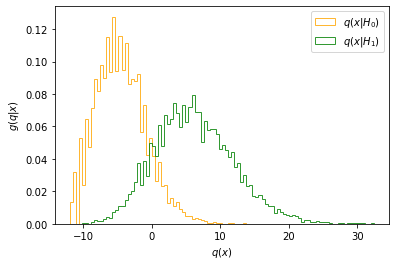

In [11]:
b, s, size = np.array([2., 1.5, 1., 0.5]), np.array([1., 2., 2., 1.]), 10000
# generators of n-poisson for b and b+s
h0, h1 = htcata.poisson_ncounter(b), htcata.poisson_ncounter(b + s)
# test of simple hypothesis - generate events and compute test-statistic
ht  = htcore.htsimple(h0, h1, size)
# plot test-statistic distribution (plot x0 if provided as argument)
htplot.plt_htsimple(ht, nbins = 100);
#plt_test_stats(ht.q0s, ht.q1s, range = ht.qrange())

**Exercise**: Consider the expected bacground events and signal events in bins of energy in the RoI of the KamLAND-Zen experiment in Fig 2-b) [PRL-117](https://arxiv.org/abs/1605.02889). And compute now the pdfs of $q$ for only background and 10 times the signal.


*Guide:* 

From Fig 2-b) Period II we can extract the following number of background, signal and observed events.

*b* = [4.0, 2.0, 1.6, 1.0, 0.8, 0.7, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.8, 1.1]

*s* = [0.2, 0.4, 0.5, 0.6, 0.5, 0.4, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0]

*x* = [4.0, 0.0, 2.0, 4.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 2.0, 1.0, 0.0]

In [12]:
b = [4.0, 2.0, 1.6, 1.0, 0.8, 0.7, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.8, 1.1]
s = [0.2, 0.4, 0.5, 0.6, 0.5, 0.4, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0]
x = [4.0, 0.0, 2.0, 4.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 2.0, 1.0, 0.0]

----

## Significance and power


We can classify events into $H_0$ or $H_1$ hypothesis using a threshold, $k$, on the test statistics:

$$
q(x) < k
$$

An observation data, $x_0$, with a test-statistics, $q_0 = q(x_0)$, is classified as $H_0$ if $q_0  < k $ and as $H_1$ if $q_0 \ge k$. This is known as the Neyman's approach. 

What is the value of $k$? It depends of the case: if not the same to separate $b/c$ jets than to search for a new SUSY particle or a Majorana neutrino!



We define the **significance**, also called *size of the test*, $\alpha$: 

$$
\alpha = \int_{k}^{\infty} g(q({\bf x}) \, | \, H_0) \, \mathrm{d}x
$$

the significance, $\alpha$, is also called *error of 1st kind* and **p-value** of $H_0$. Its the probability of claim $H_1$ when in fact it is $H_0$. The *false positives*! The *contamination*!


The **p-value** is the probability that we get a event with equal or less *compatibility with a given hypothesis* than for the observed data. To get an event as *extreme or more extreme* than the one observed.


Finally,

$$
\beta = \int_{-\infty}^{k} g( q({\bf x}) \, | \, H_1) \, \mathrm{d}x
$$

It is the *error of 2nd kind* or the **p-value of $H_1$**. 

The **power** of the test (or efficiency) is $1-\beta$, the fraction of events classified as $H_1$ when $H_1$ is true. The true positives! The *efficiency*!

The **Neyman-Person lemma** stablishes that the *optimal* test statistic is the **likelihood ratio**. Optimal indicates that we obtain the maximum power (efficiency) for a fix significance (contamination) of the test. 

**Example** In the case of the two gaussians, the p-values, $\alpha$, $\beta$, are the integrals of the colored areas.

observed data : [-0.55520119]
H0 p-value    : 0.71062147
H1 p-value    : 0.00018884
CLs           : 0.00065259 


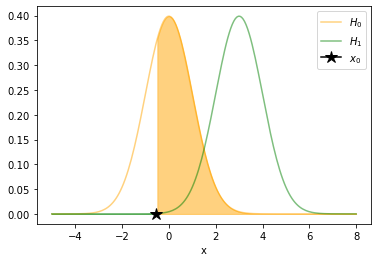

In [13]:
mu0, mu, mutrue = 0, 3, False
httoys.gaussian(mu0, mu, mutrue = mutrue);

We call the RoC curve the efficiency (or power or $1 - \beta$), vs rejection (or 1-$\alpha$) of the background. This is usually the plot that shows the discrimination power of the test-statistics. 

As mentioned before the cut $k$ to classify an event as $H_0$ or $H_1$ depends on the case. It is not the same to identify the tag of a jet than to identify the Higgs boson.

**Exercise**: In the previous case, compute the RoC curve, the $H_1$ efficiency vs $H_0$ rejection.

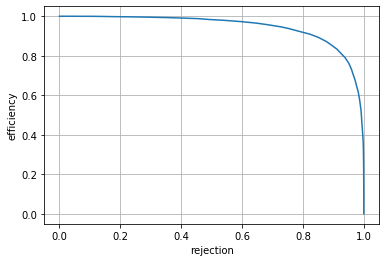

In [14]:
qrange = np.linspace(*ht.qrange(), 100)
rej = [1. - ht.p0value(qi) for qi in qrange]
eff = [1. - ht.p1value(qi) for qi in qrange]
plt.plot(rej, eff); plt.grid(True);
plt.xlabel('rejection'); plt.ylabel('efficiency');


## Discovery and rejection

We claim:

* **discovery** (evidency) of $H_1$ if the $H_0$ p-value ($\alpha$) is lower that $2.87 \times 10^{-7}$, that corresponds to $Z = 5$. 

Z-value is the p-value in terms of 'sigmas' of a Gaussian distribution!

* **observation** of $H_1$ if the $H_0$ p-value ($\alpha$) is lower than $0.0027$, that is $Z=3$.

**This is a convention!** And statisticians like to discuss about it!

Note that *discovery* means that we *false* a hypothesis, $H_0$ (à la Popper)


**Example** Consider the gaussians in the next cell, move the alternative to $\mu = 5$ and generate some events for $H_1$ true. Have you discover $H_1$? 

**Question** What is the fraction of the events in whose you could claim discovery?

observed data : [6.86111895]
H0 p-value    : 0.00000000
H1 p-value    : 0.96863631
CLs           : 0.96863631 


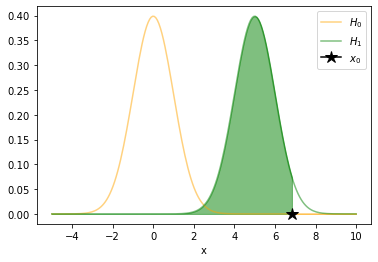

In [15]:
mu0, mu, mutrue = 0, 5., True
httoys.gaussian(mu0, mu, mutrue = mutrue);

We set:

* an **exclusion** limit on $H_1$ at a $\beta$ (i.e. 90) confidence level, CL, if $H_1$ p-value, is $\le 1-\beta$.

That is the probability to get an event with lower compatibility with $H_1$ than the observed event is smaller than 10% for 90 % CL.

**Example**: In the case of the gaussians, move $\mu_1 = 2.5$ and generate events if $H_1$ is false.
    Can you exclude $H_1$ at 90% CL? In what fraction of the events you will exclude $H_1$?

observed data : [-1.66800832]
H0 p-value    : 0.95234296
H1 p-value    : 0.00001536
CLs           : 0.00032238 


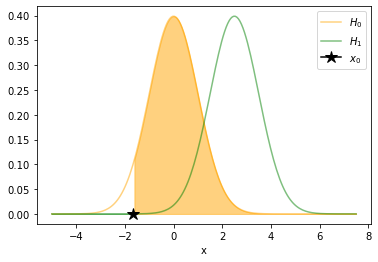

In [16]:
mu0, mu, mutrue = 0, 2.5, False
httoys.gaussian(mu0, mu, mutrue = mutrue);


We define:

* the **reach** of an experiment as the expected exclusion of $H_1$, $\beta$, for the median of the $g(q | H_0)$ pdf.

That is, in the case there is no signal, and we observe data in the median of the $H_0$ distribution, the reach is the limit we impose in $H_1$, its p-value.

* the **discovery potential** of an experiment is the $H_0$ p-value for the median of the $g(q | H_1)$ pdf.

That is, in the case that $H_1$ is true, and we observe data in the median of the $H_1$ distribution. The potential is the p-value of $H_0$ (the falseability!).

**Example** Consider the gaussian again, with $\mu = 5, \sigma = 2.5$, in the next cells we compute the sensitivity and the discovery potencial for this case.

observed data : [2.21525579]
H0 p-value    : 0.01337126
H1 p-value    : 0.13266154
CLs           : 0.13445943 


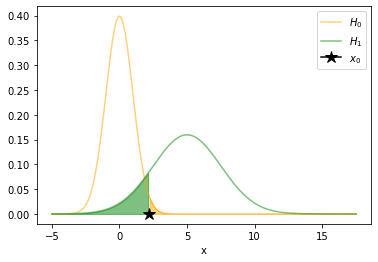

In [17]:
mu0, mu, sigma1, mutrue = 0, 5., 2.5, False
httoys.gaussian(mu0, mu, mutrue = mutrue, sigma1 = sigma1);

observed data : 5.0
H0 p-value    : 0.00000029
H1 p-value    : 0.50000000
CLs           : 0.50000014 


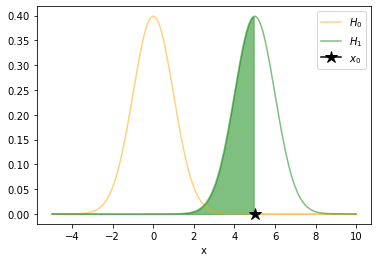

In [18]:
mu0, mu, sigma1, mutrue = 0, 5., 1., True
httoys.gaussian(mu0, mu, x0 = mu, mutrue = mutrue, sigma1 = sigma1);

**Exercise:** An experiment expects $(2, 1)$ background events in two bins, and a possible signal $(8, 9)$ on top. It observes $(9, 9)$, can claim observation?

**Exercise:** In the case it observes $(1, 1)$, can reject the signal at 95 % CL?

**Exercise:** Consider an experiment with several independent channels that expects as background ${\bf b} = (2, 1.5, 1, 0.5) $ and as signal ${\bf s} = (1, 3, 3, 1)$. It finally measures $(2, 1, 1, 0)$. Compute the p-value of $H_1$. 

**Exercise:** Consider the above case of KamLAND-Zen, compute the p-value of $H_0$!

----

## The CLs method

In some cases the $H_1$ hypothesis is 'weak' compared with $H_0$ and the distributions of the test statistic $g(q \, | H_0)$ and $g(q \, | \,H_1) $ overlap. 

**Example**: Consider$H_0$ as a poisson of $b$ expected events, $b=4$, and the signal $s=0.5$ events. 

**Question**: If we measure $n \, = \,1$, the p-value for $H_1$ is $0.061$, bellow 10%. Do we exclude the signal at 90% CL? 

observed data : 1
H0 p-value    : 0.98168436
H1 p-value    : 0.06109948
CLs           : 0.66718373 


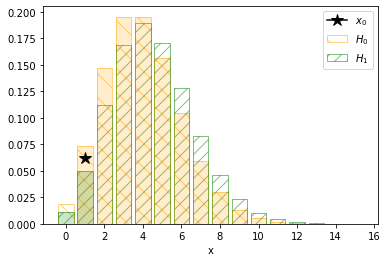

In [19]:
b, s, x0 = 4, 0.5, 1
httoys.poisson(b, b + s, x0); 

The pdfs of the test statistics, $g(q | H_0), \, g(q | H_1)$, for $b=4, \, s+b=4.5$ mostly overlap! 

In principle we reject $H_1$ at 90% CL. But the probability to accept $H_0$ is very small, $1-\alpha$! 

It will be more prudent to not reject $H_1$ and conclude that *the experiment has no enough reach*.

One solution to this problem is to use the CLs method. 

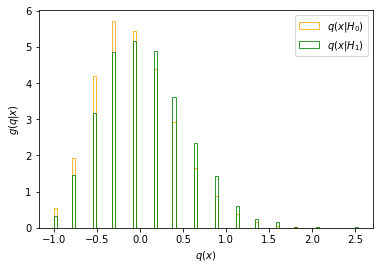

In [20]:
h0, h1, size = stats.poisson(4), stats.poisson(4.5), 10000
ht = htcore.htsimple(h0, h1, size)
htplot.plt_htsimple(ht);

In [21]:
ns = range(12)
qs = ht.q(ns)
betas  = [ht.p1value(qi) for qi in qs]
clss   = [ht.cls    (qi) for qi in qs] 
clline = 0.1*np.ones(len(ns))

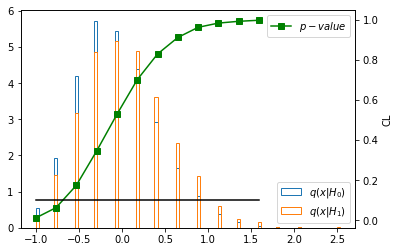

In [22]:
fig, ax = plt.subplots()
ax.hist(ht.q0s, bins = 100, density = True, range = ht.qrange(), histtype ='step', label = '$q(x|H_0)$')
ax.hist(ht.q1s, bins = 100, density = True, range = ht.qrange(), histtype ='step', label = '$q(x|H_1)$')
axb = ax.twinx()
axb.plot(qs, betas , marker='s', color = 'green', label = '$p-value$');
#axb.plot(qs, clss  , marker='o', color = 'red', label = '$CLs$');
axb.plot(qs, clline, color = 'black');
axb.set_ylabel('CL');
axb.legend(); ax.legend(loc = 4);


The [CLs method](https://arxiv.org/abs/hep-ex/9902006) was developed to prevent these cases.


Instead of using the $H_1$ p-value, $\beta$, to reject $H_1$, it uses the value:

$$
CL_s \equiv \frac{CL_{s+b}}{CL_b} = \frac{\beta}{1-\alpha}
$$

That is, a ratio of fractions. Given an observation, the fraction of possible equal or worse events if we consider the $H_1$ hypothesis, with respect the fraction of possible equal or better events if we do the same with $H_0$.

Notice that $CLs$ is conservative, $CLs \ge \beta$. And that $1-\alpha \ge \beta$, the probability to accept $H_0$ is always greater than to reject $H_1$.

In the previous example, the $H_1$ p-value was 0.06, but CLs value is 0.66! Therefore, we do not exclude $H_1$. 

The CLs has prevent us to do an exclusion when the experiment has not enough sensitivity!

In the case that $H_1$ is well separated compared with $H_0$ a cut on $CL_s$ is equivalent to a cut on $\beta$.

The CLs method has been criticized as conservative, but has been and is frequenly used in HEP.


**Example** In the previous examples we have impossed $H_1$ p-value and $CL_s$, if we observe $n=1$, we will not reject $H_1$ using the CLs method.

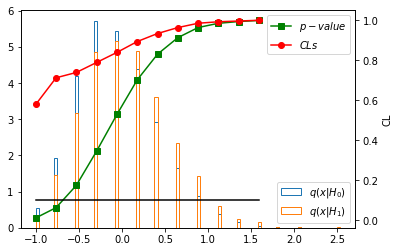

In [23]:
fig, ax = plt.subplots()
ax.hist(ht.q0s, bins = 100, density = True, range = ht.qrange(), histtype ='step', label = '$q(x|H_0)$')
ax.hist(ht.q1s, bins = 100, density = True, range = ht.qrange(), histtype ='step', label = '$q(x|H_1)$')
axb = ax.twinx()
axb.plot(qs, betas , marker='s', color = 'green', label = '$p-value$');
axb.plot(qs, clss  , marker='o', color = 'red', label = '$CLs$');
axb.plot(qs, clline, color = 'black');
axb.set_ylabel('CL');
axb.legend(); ax.legend(loc = 4);

---

## Nuissance parameters 

Sometime the pdf depends also not only on $\mu$ but on other parameters, $\nu$ of no "physical interest". There are called **nuissance parameters**.

The pdf $g(x \, | \, \mu, \nu)$, were $\mu$ is the parameter of interest, and $\nu$ the nuisance parameter. 


In some cases, we can marginalize the nuissance parameters. One possibility is use [the Cousins-Highland method](http://www.sciencedirect.com/science/article/pii/0168900292907945) also known as a bayesian-frequentist hybrid method.

If we know the pdf of the nuisance parameter: $\pi(\nu)$, we can marginalize its effect:

$$
g(x \, | \, \mu) = \int g( x \, | \, \mu, \nu) \, \pi(\nu) \, \mathrm{d}\nu
$$

Its common to take $\pi(\nu)$ as a gaussian with mean $\hat{\nu}$ and sigma $\sigma_\nu$.

Notice that this method is a hybrid: frequentist-bayesian.

**Exercise:** Consider the case of an experiment that expects $b=2 \pm 0.2$ background events, and search for a signal $s=5$. What is the effect of the uncertainty on $b$ in the expected 95% CL limit?

## Intro to composite hypothesis

Often the $H_1$ hypothesis is not complete, it depends on several parameters.  

A typical example if searching for a new signal with a unkown cross-section or half-lifetime. We resume the unknown into a parameter, $\mu$, that quantifies the strength of the signal.

$H_1$ depends now on $\mu$. When $\mu=0$, we recuperate the case $H_0$.



We have a continuous set of hypothesis. This is know as **composite hypothesis testing**. How we proceed? 

We can scan along $\mu$ and repeat the hypothesis test. But this can be *computationally expensive.*

In some case there are simpler solutions, but first we need to go back to the concept of **Confidence Levels**.

As we shall see composite hypothesis testing and confidence intervals are in fact the same thing.

**Exercise** An experiment searches for a new signal expected $s=1$ according with SM, in a background $b=0.5$, but the strength of the signal can be 10 times more. If there is no signal, what is the 90% CL exclusion sensitivity in terms of $\mu$?